# Introduction to Geopandas
### in Python

GeoPandas is a library for working with spatial (typically geographic) data. It extends the functionality of pandas to support spatial data types and operations, making it easier to analyze, visualize, and manipulate spatial data. Many of the tasks that are typically done within a GIS can be done via geopandas.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Loading, Exploring, and Geometric Data Types

Geospatial data represents real-world features using three primary geometric types:
 - Points: Single (x,y) coordinates for discrete locations like transit stops or landmarks.
 - Lines: Connected sequences of points forming paths, such as roads or rivers.
 - Polygons: Closed shapes defining areas like census tracts or property boundaries.

In [2]:
transit_stops = gpd.read_file("data/ttc_stops.geojson")
transit_routes = gpd.read_file("data/ttc_routes.geojson")
census_tracts = gpd.read_file("data/toronto_census_tract_2021.shp")
census_data = pd.read_csv("data/census_tract_data_sample.csv")

In geopandas, we typically load data with a more agnostic [read_file()](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html) function. For this workshop, we're going to use four sources of data:
 - `transit_stops`: each of the stops for the TTC
 - `transit_routes`: each of the lines for the TTC
 - `census_tracts`: The geometry of Canadian census tracts within Toronto
 - `census_data`: the data of Canadian census tracts within Toronto

Let's take a look at the first layer, the transit stops. We have two columns with text, and a third with geometry data.

In [3]:
transit_stops

,LOCATION_N,NAME,geometry
0,Avenue,Eglinton Crosstown LRT,POINT (-79.40851 43.70460)
1,Forest Hill,Eglinton Crosstown LRT,POINT (-79.42556 43.70102)
2,Leaside,Eglinton Crosstown LRT,POINT (-79.37715 43.71105)
3,Sloane,Eglinton Crosstown LRT,POINT (-79.31352 43.72597)
4,Birchmount,Eglinton Crosstown LRT,POINT (-79.27791 43.73006)
...,...,...,...
101,Vaughan Metropolitan Centre,Toronto-York Spadina Subway Extension,POINT (-79.52727 43.79351)
102,Sheppard-Yonge,Sheppard Subway,POINT (-79.41092 43.76151)
103,Spadina,Bloor-Danforth Subway,POINT (-79.40397 43.66728)
104,St. George,Bloor-Danforth Subway,POINT (-79.39930 43.66827)


The data can be manipulated like a regular pandas data frame. For example, if we want to filter out all stations on the "Eglinton Crosstown LRT" line, since it hasn't been completed yet (at the time of writing), we can do so as follows:

In [4]:
transit_stops = transit_stops.loc[transit_stops["NAME"] != "Eglinton Crosstown LRT"]
transit_stops

,LOCATION_N,NAME,geometry
25,Kipling,Bloor-Danforth Subway,POINT (-79.53628 43.63694)
26,Islington,Bloor-Danforth Subway,POINT (-79.52459 43.64532)
27,Royal York,Bloor-Danforth Subway,POINT (-79.51129 43.64811)
28,Old Mill,Bloor-Danforth Subway,POINT (-79.49509 43.65007)
29,Jane,Bloor-Danforth Subway,POINT (-79.48446 43.64979)
...,...,...,...
101,Vaughan Metropolitan Centre,Toronto-York Spadina Subway Extension,POINT (-79.52727 43.79351)
102,Sheppard-Yonge,Sheppard Subway,POINT (-79.41092 43.76151)
103,Spadina,Bloor-Danforth Subway,POINT (-79.40397 43.66728)
104,St. George,Bloor-Danforth Subway,POINT (-79.39930 43.66827)


We can do the same for the transit lines data. Here the data are coded as a `MULTILINESTRING`, essentially a combination of lines that combine into one object. There are also `MULTIPOLYGON` geometry types

In [5]:
transit_routes = transit_routes.loc[transit_routes["NAME"] != "Eglinton Crosstown LRT"]
transit_routes

,STATUS,TECHNOLOGY,NAME,geometry
0,Existing,Subway,Sheppard Subway,"MULTILINESTRING ((-79.41092 43.76151, -79.4096..."
1,Existing,Subway,Yonge-University-Spadina Subway,"MULTILINESTRING ((-79.46247 43.75043, -79.4621..."
2,Existing,Subway,Spadina Subway Extension,"MULTILINESTRING ((-79.52727 43.79351, -79.5261..."
4,Existing,Subway,Scarborough RT,"MULTILINESTRING ((-79.26453 43.73226, -79.2632..."
5,Existing,Subway,Bloor Subway,"MULTILINESTRING ((-79.26453 43.73226, -79.2669..."


Before we go on, it's important to have an idea of the metadata of geometric files that we work with. There's two key parts to this.
 - CRS (Coordinate Reference System): The [crs](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.crs.html) attribute defines a geodataset's spatial "coordinate system" (e.g., latitude/longitude, meters-based projections). We can use it to ensure layers align—for example, combining Toronto census tracts (EPSG:3347) with a Web Mercator basemap (EPSG:3857).
 - Total Bounds: The [total_bounds](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.total_bounds.html) attribute returns the min/max coordinates (xmin, ymin, xmax, ymax) of your data’s extent. It’s useful for setting map zoom levels or clipping other datasets to the same area—like focusing a transit map on Toronto’s downtown core.

In [6]:
transit_stops.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
transit_stops.total_bounds

array([-79.53627668,  43.63693527, -79.25160004,  43.79350523])

## Basic Static Plots

We explore geometry simply by plotting using `.plot()`. We can do this for any row, or the entire GeoDataFrame

<Axes: >

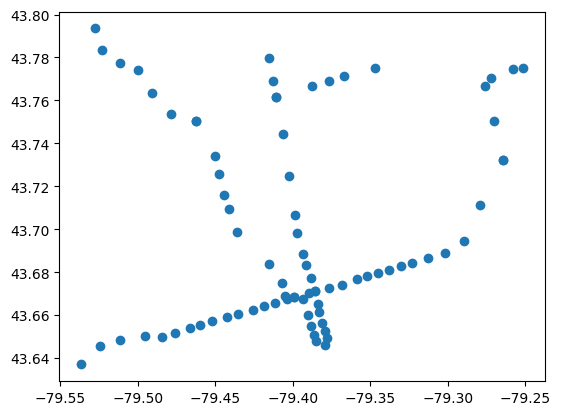

In [8]:
transit_stops.plot()

This is the default plot, but we can tweak the colours, add multiple layers, and change some of the layout options using [matplotlib](https://matplotlib.org/), probably the most commonly used map. Here's a very simple schematic of rapid transit in Toronto (circa 2021)

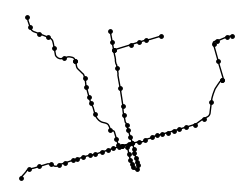

In [9]:
fig, ax = plt.subplots(ncols = 1, figsize=(3, 3))

transit_stops.plot(
    color="Black",
    markersize = 6,
    ax = ax
)

transit_routes.plot(
    linewidth = 1,
    color="Black",
    ax = ax
).set_axis_off()

Let's take a look at the census tract data. Here we have polygon geometries.

In [10]:
census_tracts

,id,ctuid,dguid,ctname,landarea,pruid,geometry
0,487,5350128.04,2021S05075350128.04,0128.04,0.1620,35,"POLYGON ((629437.750 4839364.950, 629247.561 4..."
1,502,5350363.06,2021S05075350363.06,0363.06,0.8210,35,"POLYGON ((640741.738 4848050.419, 640723.345 4..."
2,506,5350363.07,2021S05075350363.07,0363.07,2.2422,35,"POLYGON ((642782.718 4849973.938, 642781.180 4..."
3,508,5350378.23,2021S05075350378.23,0378.23,1.5314,35,"POLYGON ((639248.900 4849901.332, 639248.900 4..."
4,509,5350378.24,2021S05075350378.24,0378.24,2.5129,35,"POLYGON ((639952.255 4850407.204, 639952.255 4..."
...,...,...,...,...,...,...,...
580,5861,5350210.04,2021S05075350210.04,0210.04,0.4751,35,"MULTIPOLYGON (((623047.314 4831182.748, 623047..."
581,5862,5350062.03,2021S05075350062.03,0062.03,0.4638,35,"POLYGON ((629776.795 4835352.843, 629766.377 4..."
582,5863,5350062.04,2021S05075350062.04,0062.04,0.1215,35,"POLYGON ((630319.668 4835517.832, 630149.660 4..."
583,5864,5350017.01,2021S05075350017.01,0017.01,0.8026,35,"POLYGON ((633075.947 4834744.346, 633089.159 4..."


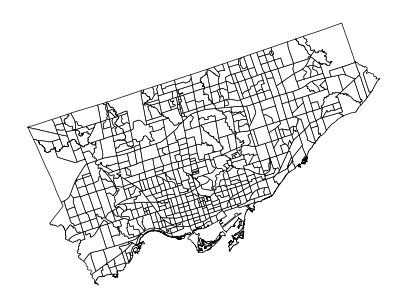

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))

census_tracts.plot(
    edgecolor="Black",
    color="White",
    linewidth=0.5,
    ax = ax
).set_axis_off()

Let's try to make a choropleth map. We'll have to join in the tabular data in `census_data`

In [12]:
census_tracts_data = census_tracts.merge(census_data, how='left', on='ctuid')

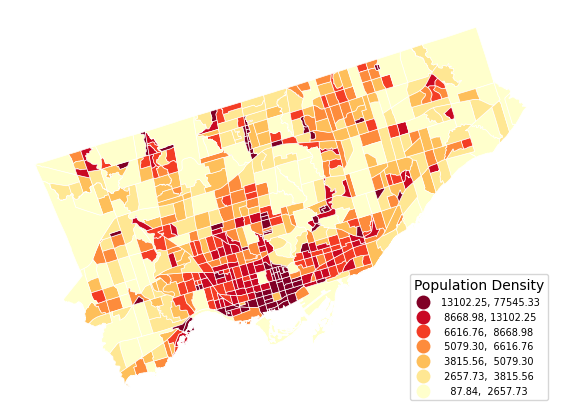

In [13]:
census_tracts_data["population density"] = census_tracts_data["population_2021"] / census_tracts_data["landarea"]

fig, ax = plt.subplots(figsize=(7, 7))

census_tracts_data.to_crs(4326).plot(
    column = "population density",
    edgecolor="White",
    cmap = 'YlOrRd', 
    k = 7,
    scheme = "Quantiles", 
    linewidth=0.5,
    legend = True,
    zorder=1,
    legend_kwds = {
        "loc": "lower right",
        "fontsize": 7,
        "title": "Population Density",
        "alignment": "left",
        "reverse": True
    },
    ax=ax
).set_axis_off()

We can choose a different variable and make a map of median income. Notice that we've also switched the color parameter `cmap`; just as in `matplotlib` generally, we can style the map as we please.

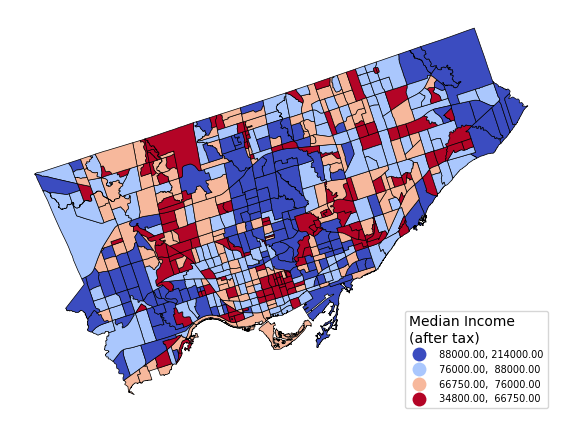

In [14]:
fig, ax = plt.subplots(figsize=(7, 7))

census_tracts_data.plot(
    column = "median_aftertax_hhld_income_2020",
    edgecolor="Black",
    cmap = 'coolwarm_r', 
    k = 4,
    scheme = "Quantiles", 
    linewidth=0.5,
    legend = True,
    legend_kwds = {
        "loc": "lower right",
        "fontsize": 7,
        "title": "Median Income\n(after tax)",
        "alignment": "left",
        "reverse": True
    },
    ax=ax
).set_axis_off()


## Interactive Exploration

GeoPandas’ [explore()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html) function  generates an interactive Leaflet map (like Google Maps) from your geodata. We can use it to better understand the data we are working with and how it might be viewed from the user side on a web application (e.g., Svelte).

You'll need to install a couple libraries in order for this to work - matplotlib, folium, and mapclassify. This can be done in the environment that you're working in with a command like `pip install folium matplotlib mapclassify`.

In [17]:
transit_stops.explore(
    column='LOCATION_N',  # Popup labels
    tiles="CartoDB Positron", 
    marker_kwds={"radius": 5}
)

## Layering Multiple Datasets

Layering lets you combine different geographic datasets (like roads on top of neighborhoods) to reveal spatial relationships. In GeoPandas, each plot() call adds a new visual layer, with zorder controlling which appears on top. These plots are highly customizable, as we see below.

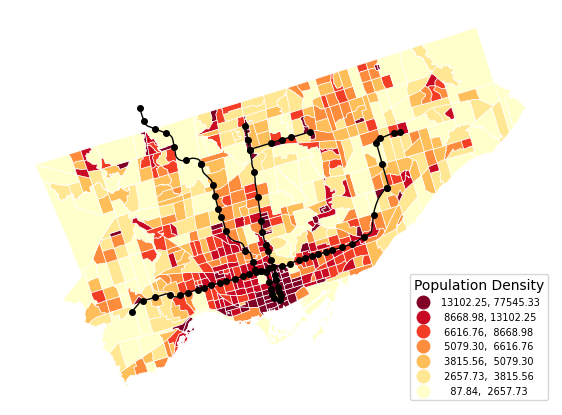

In [16]:
# Initialize the canvas (all layers will share this axis)
fig, ax = plt.subplots(figsize=(7, 7))  

# Layer 1: Transit routes (black lines on top, zorder=3)
transit_routes.to_crs(4326).plot(
    linewidth=1,        
    color="Black",      
    ax=ax,              # Draw on our shared axis
    zorder=3            # Top layer (overlaps others)
)

# Layer 2: Transit stops (black dots below routes, zorder=2)
transit_stops.to_crs(4326).plot(
    color="Black",      
    markersize=16,      
    ax=ax,              # Same shared axis
    zorder=2            # Middle layer (above tracts)
)

# Layer 3: Census tracts (colored by density, zorder=1)
census_tracts_data.to_crs(4326).plot(
    column="population density",  
    edgecolor="White",            
    cmap='YlOrRd',                
    k=7,                          
    scheme="Quantiles",           
    linewidth=0.5,                
    legend=True,                  
    zorder=1,                     # Bottom layer
    legend_kwds={
        "loc": "lower right",     
        "fontsize": 7,            
        "title": "Population Density",  
        "alignment": "left",      
        "reverse": True           
    },
    ax=ax
).set_axis_off()  # Hide distracting x/y axes